In [10]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data() # C:\Users\<Your-Username>\.keras\datasets\
print(f'train_input: {train_input.shape}, train_target: {train_target.shape}\ntest_input: {test_input.shape}, test_target: {test_target.shape}')

train_input: (60000, 28, 28), train_target: (60000,)
test_input: (10000, 28, 28), test_target: (10000,)


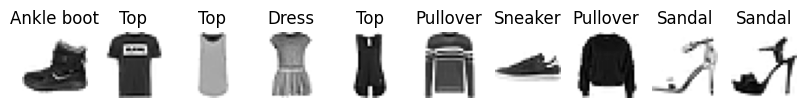

In [33]:
import matplotlib.pyplot as plt

class_names = ['Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig, axs = plt.subplots(nrows = 1, ncols = 10, figsize = (10,10))

for i in range(10):
    axs[i].imshow(train_input[i], cmap = 'gray_r')
    axs[i].set_title(f"{class_names[train_target[i]]}")
    axs[i].axis('off')
plt.show()




In [34]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


In [36]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
print(train_scaled.shape)

(60000, 784)


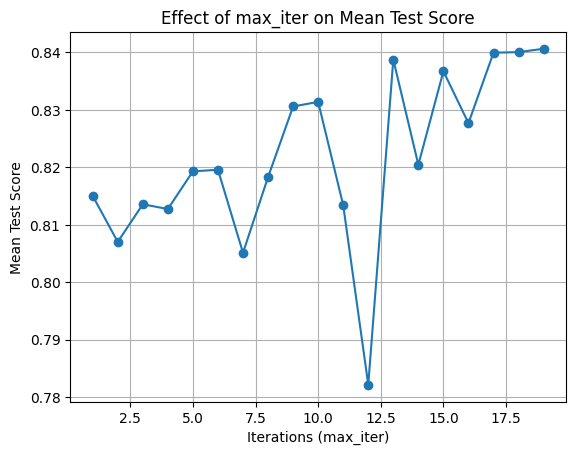

In [43]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
import numpy as np
import matplotlib.pyplot as plt

iterations = []
mean_scores = []

for i in range(1, 20):
    sc = SGDClassifier(loss = 'log_loss', max_iter = i, random_state = 42)
    scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)
    iterations.append(i)
    mean_scores.append(np.mean(scores['test_score']))

# print(np.mean(scores['test_score']))
# print(scores)

plt.plot(iterations, mean_scores, marker='o')
plt.xlabel('Iterations (max_iter)')
plt.ylabel('Mean Test Score')
plt.title('Effect of max_iter on Mean Test Score')
plt.grid(True)
plt.show()